In [2]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_1/main/home_work_7-8_clustering/Credit%20Card%20Dataset.csv', sep=',');
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


названия, типы, пропуски

In [4]:
coltype = dict();
LEN = len(list(df.columns));
print("кол-во колонок: ", LEN, '\n');
for i in df.columns:
    print("col: ", i);
    print(" type: ", type(df.loc[0, i]));
    print("   null-count: ", df[i].isna().sum(), '\n');

кол-во колонок:  18 

col:  CUST_ID
 type:  <class 'str'>
   null-count:  0 

col:  BALANCE
 type:  <class 'numpy.float64'>
   null-count:  0 

col:  BALANCE_FREQUENCY
 type:  <class 'numpy.float64'>
   null-count:  0 

col:  PURCHASES
 type:  <class 'numpy.float64'>
   null-count:  0 

col:  ONEOFF_PURCHASES
 type:  <class 'numpy.float64'>
   null-count:  0 

col:  INSTALLMENTS_PURCHASES
 type:  <class 'numpy.float64'>
   null-count:  0 

col:  CASH_ADVANCE
 type:  <class 'numpy.float64'>
   null-count:  0 

col:  PURCHASES_FREQUENCY
 type:  <class 'numpy.float64'>
   null-count:  0 

col:  ONEOFF_PURCHASES_FREQUENCY
 type:  <class 'numpy.float64'>
   null-count:  0 

col:  PURCHASES_INSTALLMENTS_FREQUENCY
 type:  <class 'numpy.float64'>
   null-count:  0 

col:  CASH_ADVANCE_FREQUENCY
 type:  <class 'numpy.float64'>
   null-count:  0 

col:  CASH_ADVANCE_TRX
 type:  <class 'numpy.int64'>
   null-count:  0 

col:  PURCHASES_TRX
 type:  <class 'numpy.int64'>
   null-count:  0 

col:  C

<Figure size 720x432 with 0 Axes>

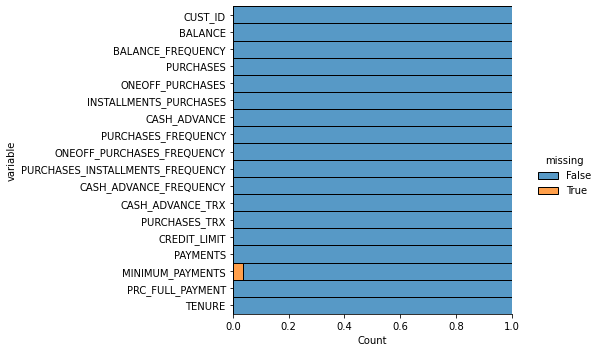

In [5]:
plt.figure(figsize=(10,6));
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
);
plt.show();

Выбросы

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

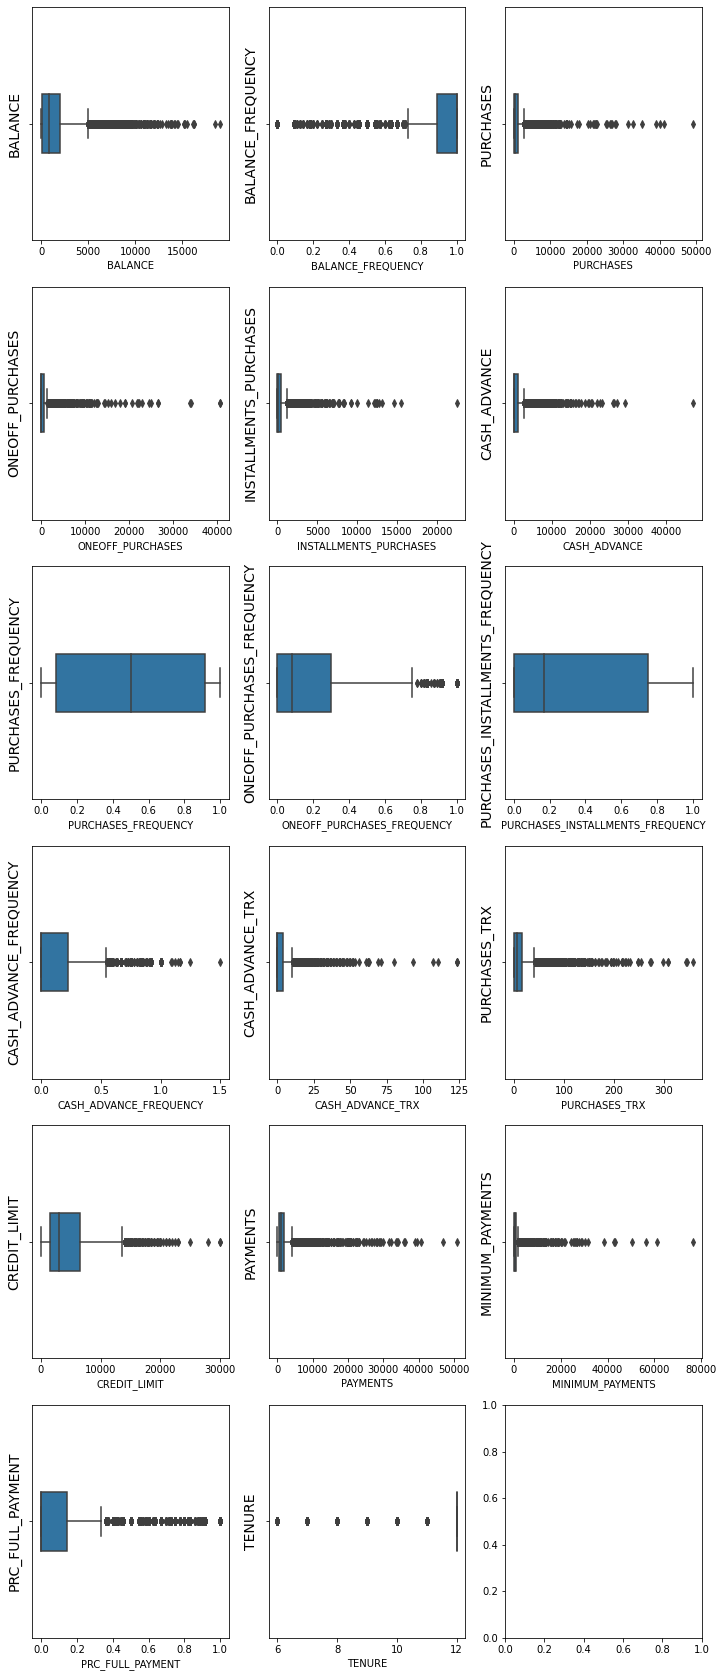

In [6]:
fig, axes = plt.subplots(6, 3, figsize=(12,30));
for i in range(LEN-1):
  ax = axes[i//3][i%3];
  ax.set_ylabel(df.columns[i + 1], fontsize=14);
  sns.boxplot(df[df.columns[i + 1]], ax=ax, width=0.25);

корреляции

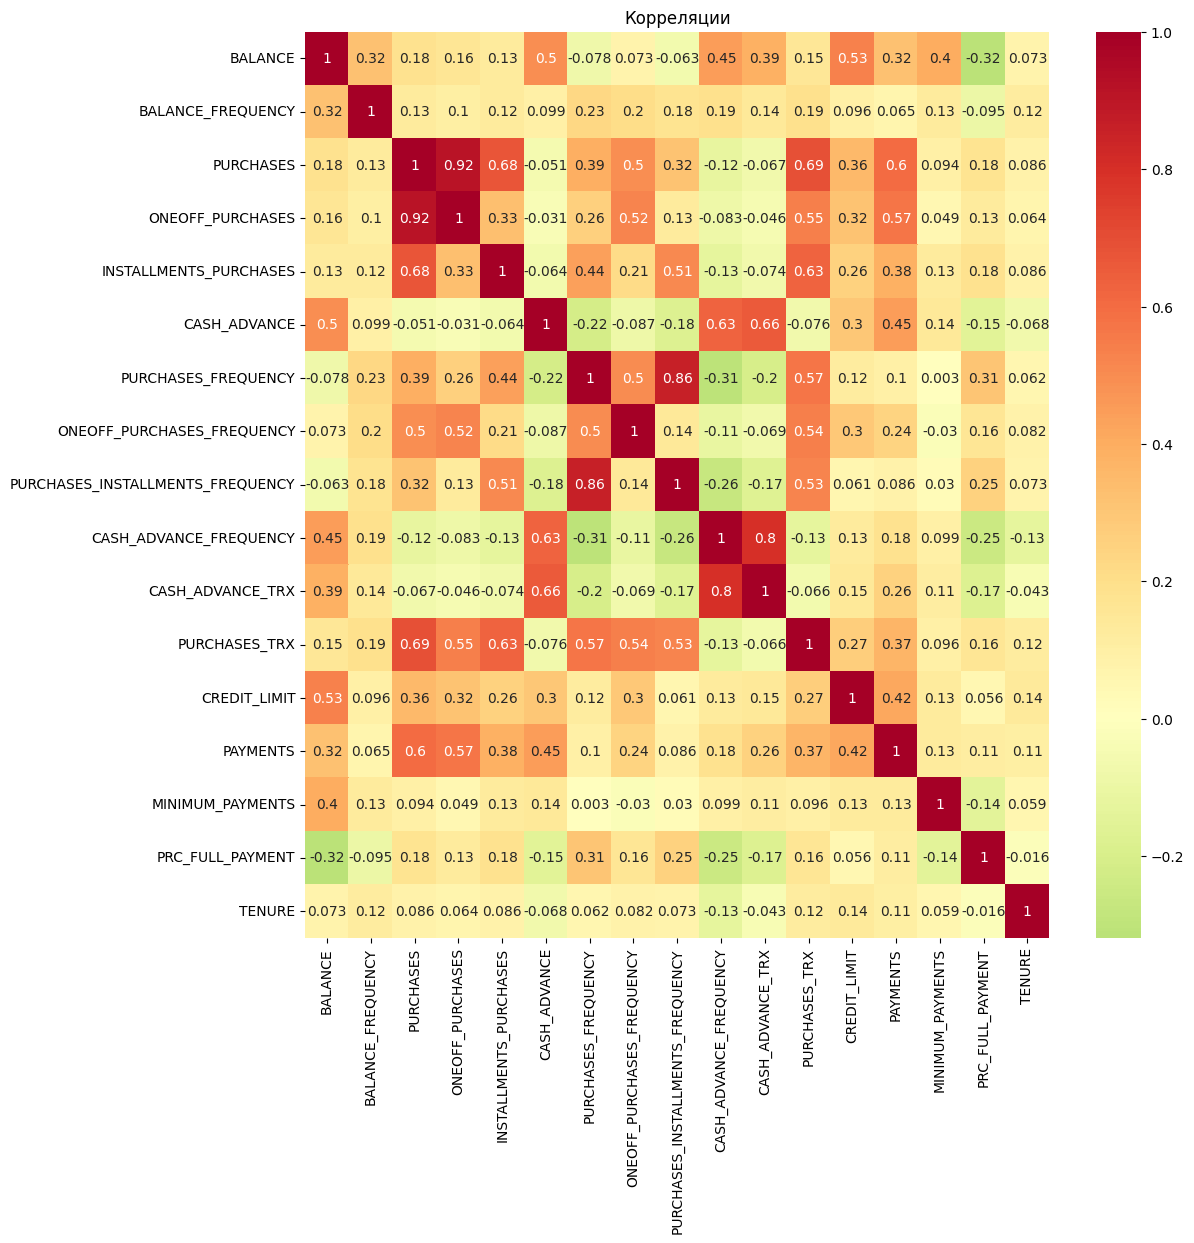

In [7]:
plt.figure(figsize=(12, 12), dpi=100);
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn_r', center=0, annot=True);
plt.title('Корреляции');
plt.show();

**Kmeans**

In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib

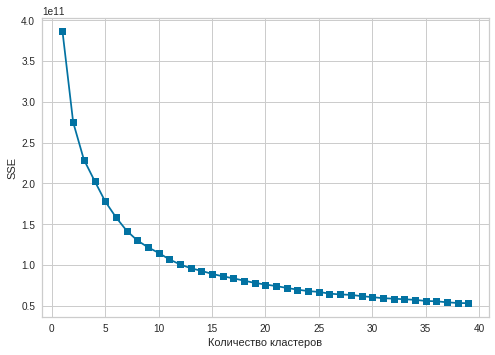

In [9]:
SSE = [];
df2 = df.drop(columns=['CUST_ID']);
df2 = df2.dropna(axis=0, how='any');
for i in range(1,40):
  kmeans = KMeans(n_clusters = i);
  kmeans.fit(df2);
  SSE.append(kmeans.inertia_);

plt.plot(range(1,40), SSE, marker='s');
plt.xlabel('Количество кластеров');
plt.ylabel('SSE');
plt.show();


График по двум переменным

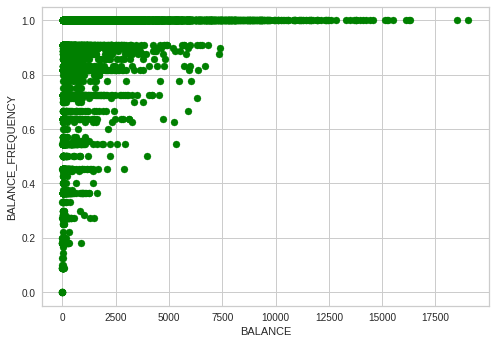

In [10]:
x = list( df2['BALANCE'] );
y = list( df2['BALANCE_FREQUENCY'] );

fig, ax = plt.subplots();

ax.scatter(x, y, c = 'green');
plt.xlabel('BALANCE');
plt.ylabel('BALANCE_FREQUENCY');

plt.show();

кластеризация

<ipython-input-17-7304962d8eea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cluster'] = Y_pred;


IndexError: ignored

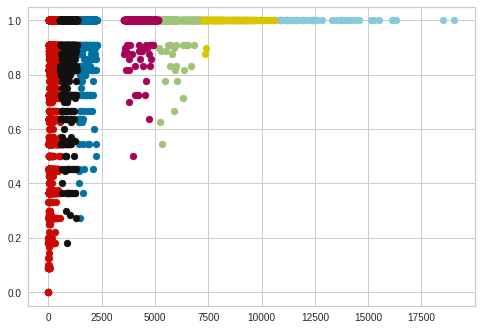

In [17]:
n_clust_df3 = 8;
kmeans = KMeans(n_clusters=n_clust_df3);
kmeans.fit(df3 := df2[['BALANCE', 'BALANCE_FREQUENCY']]);
Y_pred = kmeans.labels_

df3['cluster'] = Y_pred;
c = ['r','g','b','c','m','y','k'];

fig, ax = plt.subplots();

for i in range(n_clust_df3):
    ax.scatter(df3[df3['cluster'] == i]['BALANCE'], df3[df3['cluster']==i]['BALANCE_FREQUENCY'], c = c[i]);

plt.xlabel('BALANCE');
plt.ylabel('BALANCE_FREQUENCY');

plt.show();

**Иерархический метод кластеризации**

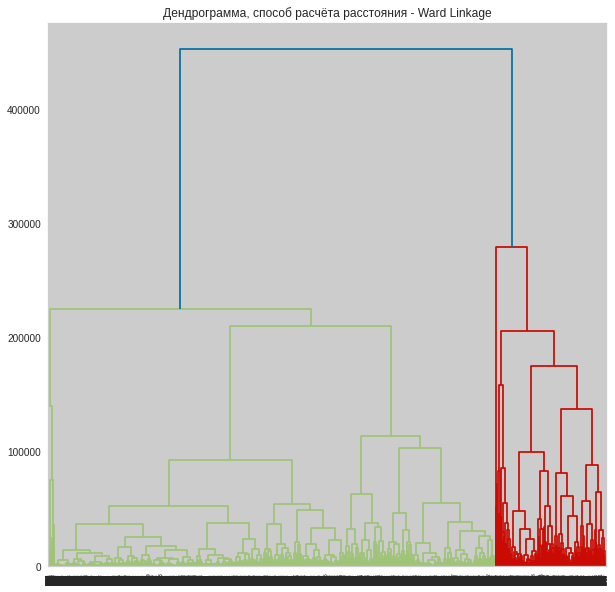

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster;
fig = plt.figure(figsize=(10, 10));

Z = linkage(df2, 'ward');
dn = dendrogram(Z);

plt.title('Дендрограммa');
plt.show();

In [14]:
Z = linkage(df2, method='average', metric='euclidean');
label = fcluster(Z, 20000, criterion='distance');
df2['cluster'] = label;

print(f'Кол-во кластеров: {len(np.unique(label))}');
print('Разделение на кластеры всех переменных:');
df2

Количество кластеров: 21
Разделение на кластеры всех переменных:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,7
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,7
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,7
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,7


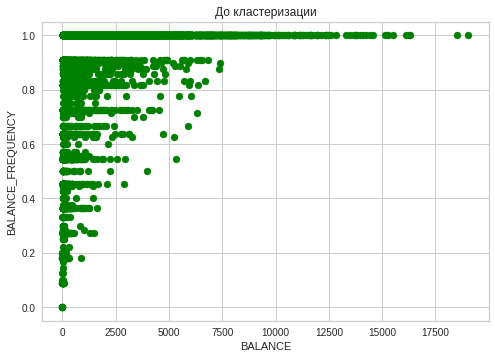

In [18]:
x = list( df2['BALANCE'] );
y = list( df2['BALANCE_FREQUENCY'] );

fig, ax = plt.subplots();

ax.scatter(x, y, c = 'green');
plt.title('До кластеризации');
plt.xlabel('BALANCE');
plt.ylabel('BALANCE_FREQUENCY');

plt.show();


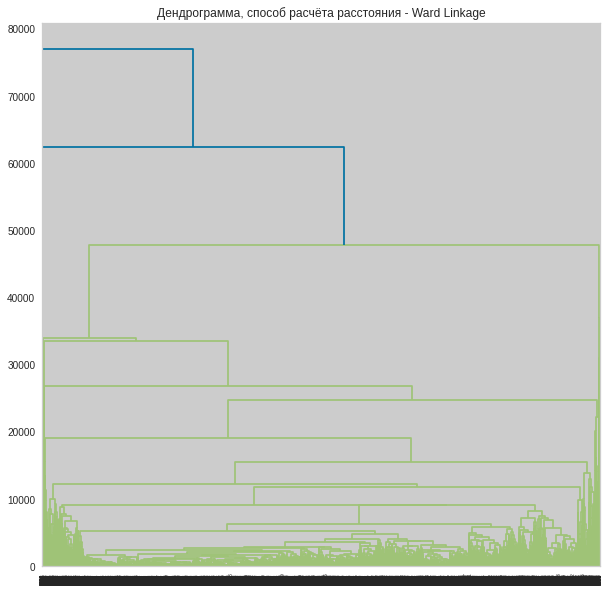

In [20]:
fig = plt.figure(figsize=(10, 10));

Z3 = linkage(df3, 'ward');
dn = dendrogram(Z);

plt.title('Дендрограмма');
plt.show();

In [25]:
Z3 = linkage(df3, 'ward')
label3 = fcluster(Z3, 30000, criterion='distance')
df3['cluster'] = label3

print(f'Количество кластеров: {len(np.unique(label3))}')
df3


Количество кластеров: 7


<ipython-input-25-12f315fa5cfd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cluster'] = label3


,BALANCE,BALANCE_FREQUENCY,cluster
0,40.900749,0.818182,6
1,3202.467416,0.909091,5
2,2495.148862,1.000000,4
4,817.714335,1.000000,7
5,1809.828751,1.000000,7
...,...,...,...
8943,5.871712,0.500000,6
8945,28.493517,1.000000,6
8947,23.398673,0.833333,6
8948,13.457564,0.833333,6
